In [2]:
import pandas as pd
from time import time
from sklearn import preprocessing
import pickle

In [3]:
def save_obj(obj, name ):
    with open(''+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

#数理统计方法，按5%区间进行数理统计
def statistics(dataset, feature_index):
    intervals = {'{0}-{1}'.format(5 * x, 5 * (x+1) ): 0 for x in range(20)}
    for _ in dataset[:,feature_index]:
        for interval in intervals:
            start, end = tuple(interval.split('-'))
            if int(start) <= _*100 <= int(end):
                intervals[interval] += 1
    return intervals



In [4]:
##收集DDoS的distribution dictionary
print("Collecting DDoS distribution dictionary")

#Data preprocessing
dataroot="../MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
df=pd.read_csv(dataroot,header=0,low_memory=False)

pd.set_option('mode.use_inf_as_na', True) # convert inf to nan
df['Flow Bytes/s']=df['Flow Bytes/s'].astype('float64')
df[' Flow Packets/s']=df[' Flow Packets/s'].astype('float64')
df['Flow Bytes/s'].fillna(df['Flow Bytes/s'].mean(),inplace=True)
df[' Flow Packets/s'].fillna(df[' Flow Packets/s'].mean(),inplace=True)
df[' Label'] = df[' Label'].apply(lambda x: 0 if 'BENIGN' in x else 1)

df.drop(df[df[' Label'] == 0].index, inplace=True)
#Feature scaling
scaler = preprocessing.MinMaxScaler()
DDosMatrix=scaler.fit_transform(df.values)
print(DDosMatrix.shape)

#DDos的分布统计字典创建并存储至文件
DDoS_Distribution_set = {}
for i in range(78):
    StatisticObj = statistics(DDosMatrix, i)
    DDoS_Distribution_set[str(i)] = StatisticObj

print(DDoS_Distribution_set)
save_obj(DDoS_Distribution_set, "DDoS_Distribution_set")

print("End of collecting DDoS distribution dictionary")

(128027, 79)
{'0': {'0-5': 128024, '5-10': 0, '10-15': 0, '15-20': 0, '20-25': 0, '25-30': 0, '30-35': 0, '35-40': 0, '40-45': 1, '45-50': 0, '50-55': 0, '55-60': 0, '60-65': 0, '65-70': 0, '70-75': 0, '75-80': 0, '80-85': 0, '85-90': 0, '90-95': 0, '95-100': 1}, '1': {'0-5': 77716, '5-10': 23535, '10-15': 4792, '15-20': 5, '20-25': 480, '25-30': 0, '30-35': 13, '35-40': 0, '40-45': 14, '45-50': 0, '50-55': 14, '55-60': 0, '60-65': 0, '65-70': 2304, '70-75': 2631, '75-80': 6989, '80-85': 1416, '85-90': 2951, '90-95': 2783, '95-100': 2384}, '2': {'0-5': 47, '5-10': 1453, '10-15': 1453, '15-20': 0, '20-25': 56728, '25-30': 0, '30-35': 23180, '35-40': 22301, '40-45': 22301, '45-50': 0, '50-55': 1189, '55-60': 0, '60-65': 1001, '65-70': 18067, '70-75': 18067, '75-80': 4057, '80-85': 4057, '85-90': 3, '90-95': 3, '95-100': 1}, '3': {'0-5': 46528, '5-10': 0, '10-15': 129, '15-20': 0, '20-25': 22, '25-30': 22, '30-35': 0, '35-40': 317, '40-45': 0, '45-50': 20690, '50-55': 20690, '55-60': 0, '

In [5]:
##收集Benign的distribution dictionary
print("Collecting Benign distribution dictionary")
dataroot2="../MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
df2=pd.read_csv(dataroot2,header=0,low_memory=False)

#df = pd.concat([df1,df2,df3],axis=0,ignore_index=True)
pd.set_option('mode.use_inf_as_na', True) # convert inf to nan
df2['Flow Bytes/s']=df2['Flow Bytes/s'].astype('float64')
df2[' Flow Packets/s']=df2[' Flow Packets/s'].astype('float64')
df2['Flow Bytes/s'].fillna(df2['Flow Bytes/s'].mean(),inplace=True)
df2[' Flow Packets/s'].fillna(df2[' Flow Packets/s'].mean(),inplace=True)
df2[' Label'] = df2[' Label'].apply(lambda x: 0 if 'BENIGN' in x else 1)

df2.drop(df2[df2[' Label'] == 1].index, inplace=True)

#train_test_split

#Feature scaling
BenignMatrix=scaler.fit_transform(df2.values)
print(BenignMatrix.shape)

#Benign的分布统计字典创建并存储至文件
Benign_Distribution_set = {}
for i in range(78):
    StatisticObj = statistics(BenignMatrix, i)
    Benign_Distribution_set[str(i)] = StatisticObj

print(Benign_Distribution_set)
save_obj(Benign_Distribution_set, "Benign_Distribution_set")

print("End of collecting Benign distribution dictionary")

(97718, 79)
{'0': {'0-5': 56465, '5-10': 34, '10-15': 1414, '15-20': 903, '20-25': 671, '25-30': 1038, '30-35': 846, '35-40': 879, '40-45': 984, '45-50': 817, '50-55': 1276, '55-60': 1310, '60-65': 1227, '65-70': 536, '70-75': 303, '75-80': 5230, '80-85': 5920, '85-90': 7228, '90-95': 6135, '95-100': 4503}, '1': {'0-5': 70120, '5-10': 10506, '10-15': 1228, '15-20': 645, '20-25': 325, '25-30': 302, '30-35': 113, '35-40': 232, '40-45': 115, '45-50': 110, '50-55': 1238, '55-60': 766, '60-65': 1560, '65-70': 2861, '70-75': 795, '75-80': 1407, '80-85': 1677, '85-90': 209, '90-95': 360, '95-100': 3149}, '2': {'0-5': 97341, '5-10': 242, '10-15': 57, '15-20': 28, '20-25': 10, '25-30': 16, '30-35': 7, '35-40': 3, '40-45': 0, '45-50': 1, '50-55': 1, '55-60': 2, '60-65': 2, '65-70': 1, '70-75': 2, '75-80': 0, '80-85': 2, '85-90': 1, '90-95': 1, '95-100': 1}, '3': {'0-5': 97420, '5-10': 166, '10-15': 56, '15-20': 28, '20-25': 13, '25-30': 10, '30-35': 10, '35-40': 3, '40-45': 3, '45-50': 1, '50-55

In [6]:
##收集PortScan的distribution dictionary
print("Collecting PortScan distribution dictionary")
dataroot3="../MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv"
df3=pd.read_csv(dataroot3,header=0,low_memory=False)

#df = pd.concat([df1,df2,df3],axis=0,ignore_index=True)
pd.set_option('mode.use_inf_as_na', True) # convert inf to nan
df3['Flow Bytes/s']=df3['Flow Bytes/s'].astype('float64')
df3[' Flow Packets/s']=df3[' Flow Packets/s'].astype('float64')
df3['Flow Bytes/s'].fillna(df3['Flow Bytes/s'].mean(),inplace=True)
df3[' Flow Packets/s'].fillna(df3[' Flow Packets/s'].mean(),inplace=True)
df3[' Label'] = df3[' Label'].apply(lambda x: 0 if 'BENIGN' in x else 1)

df3.drop(df3[df3[' Label'] == 0].index, inplace=True)

#train_test_split

#Feature scaling
PortScanMatrix=scaler.fit_transform(df3.values)
print(PortScanMatrix.shape)

#Benign的分布统计字典创建并存储至文件
PortScan_Distribution_set = {}
for i in range(78):
    StatisticObj = statistics(PortScanMatrix, i)
    PortScan_Distribution_set[str(i)] = StatisticObj

print(PortScan_Distribution_set)
save_obj(PortScan_Distribution_set, "PortScan_Distribution_set")

print("End of collecting PortScan distribution dictionary")

(158930, 79)
{'0': {'0-5': 75127, '5-10': 29916, '10-15': 23377, '15-20': 6520, '20-25': 3333, '25-30': 1743, '30-35': 1587, '35-40': 956, '40-45': 1270, '45-50': 795, '50-55': 3821, '55-60': 159, '60-65': 476, '65-70': 948, '70-75': 160, '75-80': 4613, '80-85': 1426, '85-90': 951, '90-95': 795, '95-100': 957}, '1': {'0-5': 158613, '5-10': 67, '10-15': 1, '15-20': 71, '20-25': 1, '25-30': 1, '30-35': 59, '35-40': 0, '40-45': 0, '45-50': 47, '50-55': 0, '55-60': 0, '60-65': 29, '65-70': 0, '70-75': 0, '75-80': 15, '80-85': 6, '85-90': 3, '90-95': 7, '95-100': 10}, '2': {'0-5': 158926, '5-10': 1, '10-15': 2, '15-20': 0, '20-25': 0, '25-30': 0, '30-35': 0, '35-40': 0, '40-45': 0, '45-50': 0, '50-55': 0, '55-60': 0, '60-65': 0, '65-70': 0, '70-75': 0, '75-80': 0, '80-85': 0, '85-90': 0, '90-95': 0, '95-100': 1}, '3': {'0-5': 158476, '5-10': 364, '10-15': 39, '15-20': 86, '20-25': 57, '25-30': 1, '30-35': 1, '35-40': 0, '40-45': 0, '45-50': 0, '50-55': 0, '55-60': 0, '60-65': 0, '65-70': 0,

In [10]:
#收集各个label的例子
Examples = {}
Examples["Benign"] = BenignMatrix[100]
Examples["DDoS"] = DDosMatrix[100]
Examples["PortScan"] = PortScanMatrix[100]
save_obj(Examples, "Examples")

In [11]:
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
matplotlib.rcParams['font.sans-serif'] = ['SimHei']


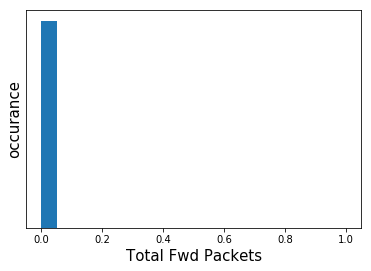

In [13]:
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 15,
}

plt.hist(PortScanMatrix[:,2],20)
plt.ylabel('occurance', font2)
plt.xlabel("Total Fwd Packets", font2)
plt.ylabel('occurance', font2)
plt.yticks([])
#plt.xlim(0, 1)
plt.savefig("3_Total_Fwd_Packets_PortScan_Distribution.eps",format="eps")
#plt.show()

In [ ]:
#选取验证集准确率最高的模型
model = keras.models.load_model('./Test7_model.h5') 
model.compile(optimizer =tf.train.AdamOptimizer(learning_rate=learning_rate),
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)
#测试集的正确率
def use_evaluate_test():
    test_loss,test_acc = model.evaluate(df_test_X,df_test_y)
    print('Test accuracy:', test_acc)
    return 
use_evaluate_test()